# EDA

## Importar librerías

In [1]:
import empiricaldist
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import seaborn as sns
import os

## Lectura del CSV

In [47]:
datos = pd.read_csv('../../datos/procesados/01_limpieza_ecobici.csv')

# Colecta y validación de datos

### ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [3]:
#Muestra el tipo de dato de las columnas y la cantidad que hay de cada una
#float64 equivale a variables numericas continuas
#object equivale a una variable nominal
#int64 equivale a variables numericas discretas
datos.dtypes.value_counts()

int64      10
object      8
float64     1
dtype: int64

### ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [4]:
#Muestra la cantidad de filas y columnas, lo que equivale a la cantidad de observaciones y variables respectivamente
datos.shape

(2860091, 19)

# Conteos y proporciones

### Preludio: ¿Qué estadísticos describen el conjunto de datos?

#### Solo las numéricas

In [5]:
#Se espesifica que se haga la estadistica de las variables numericas
datos.describe(include=[np.number])

,duracion_recorrido_segundos,origen_anio,origen_mes,origen_dia,origen_hora,origen_minuto,destino_anio,destino_mes,destino_dia,destino_hora,destino_minuto
count,2.859286e+06,2860091.0,2.860091e+06,2.860091e+06,2.860091e+06,2.860091e+06,2.860091e+06,2.860091e+06,2.860091e+06,2.860091e+06,2.860091e+06
mean,1.238466e+03,2021.0,6.313866e+00,1.556190e+01,1.426384e+01,2.907542e+01,2.021000e+03,6.313954e+00,1.556252e+01,1.443575e+01,2.992955e+01
std,9.501960e+03,0.0,3.635716e+00,8.714653e+00,5.136232e+00,1.726598e+01,3.015052e-03,3.635708e+00,8.714704e+00,5.236356e+00,1.736798e+01
min,6.100000e+01,2021.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.021000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,6.390000e+02,2021.0,3.000000e+00,8.000000e+00,1.100000e+01,1.400000e+01,2.021000e+03,3.000000e+00,8.000000e+00,1.100000e+01,1.500000e+01
50%,1.014000e+03,2021.0,6.000000e+00,1.500000e+01,1.500000e+01,2.900000e+01,2.021000e+03,6.000000e+00,1.500000e+01,1.500000e+01,3.000000e+01
75%,1.535000e+03,2021.0,1.000000e+01,2.300000e+01,1.800000e+01,4.400000e+01,2.021000e+03,1.000000e+01,2.300000e+01,1.800000e+01,4.500000e+01
max,1.351522e+07,2021.0,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,2.022000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01


#### Solo categóricas

In [6]:
#Se hace estadistica de variables categoricas
#En este caso la cantidad de estadisticas sera menor, dado el tipo de variable
datos.describe(include=[np.object])

/tmp/ipykernel_50328/16405137.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  datos.describe(include=[np.object])


,id_recorrido,nombre_estacion_origen,direccion_estacion_origen,nombre_estacion_destino,direccion_estacion_destino,id_usuario,modelo_bicicleta,usuario_genero
count,2860091,2860091,2860091,2860091,2860091,2860091,2860091,2841403
unique,2860091,274,274,275,274,181690,2,3
top,9920899BAEcobici,014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",268778BAEcobici,ICONIC,MALE
freq,1,39082,39082,37392,37392,1147,2331139,1419327


### Medidas de dispersión

#### ¿Cuál es el valor máximo de las variables?

In [7]:
datos.max()

/tmp/ipykernel_50328/607074239.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.max()


id_recorrido                    9999999BAEcobici
duracion_recorrido_segundos           13515225.0
nombre_estacion_origen         Balboa Definitivo
direccion_estacion_origen          o´higins 1327
nombre_estacion_destino        Balboa Definitivo
direccion_estacion_destino         o´higins 1327
id_usuario                        99985BAEcobici
modelo_bicicleta                          ICONIC
origen_anio                                 2021
origen_mes                                    12
origen_dia                                    31
origen_hora                                   23
origen_minuto                                 59
destino_anio                                2022
destino_mes                                   12
destino_dia                                   31
destino_hora                                  23
destino_minuto                                59
dtype: object

#### ¿Cuál es el valor mínimo de las variables?

In [8]:
datos.min()

/tmp/ipykernel_50328/3257292645.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.min()


id_recorrido                           10000000BAEcobici
duracion_recorrido_segundos                         61.0
nombre_estacion_origen         001 - FACULTAD DE DERECHO
direccion_estacion_origen                    1019 Riglos
nombre_estacion_destino        001 - FACULTAD DE DERECHO
direccion_estacion_destino                   1019 Riglos
id_usuario                               100009BAEcobici
modelo_bicicleta                                     FIT
origen_anio                                         2021
origen_mes                                             1
origen_dia                                             1
origen_hora                                            0
origen_minuto                                          0
destino_anio                                        2021
destino_mes                                            1
destino_dia                                            1
destino_hora                                           0
destino_minuto                 

#### ¿Cuál es el rango intercuartílico?

In [9]:
#Quartil 3
q3, q2, q1 = datos.quantile(0.75), datos.quantile(0.50), datos.quantile(0.25)

/tmp/ipykernel_50328/1531321204.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3, q2, q1 = datos.quantile(0.75), datos.quantile(0.50), datos.quantile(0.25)


In [10]:
#Rango intercuartilico
rango_intercuartilico = q3 - q1

### Codificacion de datos categoricos

#### Categoricos ordinales

In [ ]:
##No hay

#### Categoricos nominales

In [11]:
from sklearn.preprocessing import LabelEncoder

In [46]:
# Seleccionar las columnas de tipo object
object_columns = datos.select_dtypes(include=['object']).columns.copy()
datos_codificados = datos.copy()

# Iterar sobre las columnas seleccionadas y aplicar la codificación
for column in object_columns:
    encoder = LabelEncoder()
    datos_codificados[column] = encoder.fit_transform(datos_codificados[column].astype(str))

In [13]:
datos

,id_recorrido,duracion_recorrido_segundos,nombre_estacion_origen,direccion_estacion_origen,nombre_estacion_destino,direccion_estacion_destino,id_usuario,modelo_bicicleta,usuario_genero,origen_anio,origen_mes,origen_dia,origen_hora,origen_minuto,destino_anio,destino_mes,destino_dia,destino_hora,destino_minuto
0,2793276,2026.0,69,1,8,159,30907,1,2,2021,1,26,19,58,2021,1,26,20,31
1,2791381,1474.0,160,215,9,35,73145,1,2,2021,1,26,17,37,2021,1,26,18,2
2,2789969,629.0,136,172,11,120,95289,1,0,2021,1,26,15,24,2021,1,26,15,35
3,2791808,616.0,15,163,12,251,2488,1,0,2021,1,26,18,11,2021,1,26,18,21
4,2793918,684.0,37,108,12,251,73605,1,0,2021,1,26,20,38,2021,1,26,20,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860086,2401303,1578.0,77,58,265,29,96262,0,1,2021,12,10,18,28,2021,12,10,18,54
2860087,2395533,3008.0,166,12,178,218,11597,0,1,2021,12,10,10,36,2021,12,10,11,26
2860088,2400376,2072.0,203,155,92,239,37200,0,1,2021,12,10,17,29,2021,12,10,18,4
2860089,2396562,1246.0,173,169,173,89,148213,0,0,2021,12,10,12,36,2021,12,10,12,56


## Escalamiento

### Escala en función del mínimo y máximo

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
# Separar características numéricas y categóricas
numeric_features = datos.select_dtypes(include=['int', 'float']).columns

# Escalamiento de características numéricas
scaler = MinMaxScaler()
scaled_data = datos.copy()
scaled_data[numeric_features] = scaler.fit_transform(datos[numeric_features])

In [16]:
# convierte vectores de numpy a DataFrames para graficarlos
datos_escalados = pd.DataFrame(scaled_data, columns=datos.columns)

In [17]:
datos_escalados

,id_recorrido,duracion_recorrido_segundos,nombre_estacion_origen,direccion_estacion_origen,nombre_estacion_destino,direccion_estacion_destino,id_usuario,modelo_bicicleta,usuario_genero,origen_anio,origen_mes,origen_dia,origen_hora,origen_minuto,destino_anio,destino_mes,destino_dia,destino_hora,destino_minuto
0,0.976639,0.000145,0.252747,0.003663,0.029197,0.582418,0.170109,1.0,0.666667,0.0,0.0,0.833333,0.826087,0.983051,0.0,0.0,0.833333,0.869565,0.525424
1,0.975977,0.000105,0.586081,0.787546,0.032847,0.128205,0.402584,1.0,0.666667,0.0,0.0,0.833333,0.739130,0.627119,0.0,0.0,0.833333,0.782609,0.033898
2,0.975483,0.000042,0.498168,0.630037,0.040146,0.439560,0.524462,1.0,0.000000,0.0,0.0,0.833333,0.652174,0.406780,0.0,0.0,0.833333,0.652174,0.593220
3,0.976126,0.000041,0.054945,0.597070,0.043796,0.919414,0.013694,1.0,0.000000,0.0,0.0,0.833333,0.782609,0.186441,0.0,0.0,0.833333,0.782609,0.355932
4,0.976864,0.000046,0.135531,0.395604,0.043796,0.919414,0.405115,1.0,0.000000,0.0,0.0,0.833333,0.869565,0.644068,0.0,0.0,0.833333,0.869565,0.830508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860086,0.839590,0.000112,0.282051,0.212454,0.967153,0.106227,0.529817,0.0,0.333333,0.0,1.0,0.300000,0.782609,0.474576,0.0,1.0,0.300000,0.782609,0.915254
2860087,0.837573,0.000218,0.608059,0.043956,0.649635,0.798535,0.063829,0.0,0.333333,0.0,1.0,0.300000,0.434783,0.610169,0.0,1.0,0.300000,0.478261,0.440678
2860088,0.839266,0.000149,0.743590,0.567766,0.335766,0.875458,0.204745,0.0,0.333333,0.0,1.0,0.300000,0.739130,0.491525,0.0,1.0,0.300000,0.782609,0.067797
2860089,0.837932,0.000088,0.633700,0.619048,0.631387,0.326007,0.815751,0.0,0.000000,0.0,1.0,0.300000,0.521739,0.610169,0.0,1.0,0.300000,0.521739,0.949153


In [18]:
datos_escalados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860091 entries, 0 to 2860090
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   id_recorrido                 float64
 1   duracion_recorrido_segundos  float64
 2   nombre_estacion_origen       float64
 3   direccion_estacion_origen    float64
 4   nombre_estacion_destino      float64
 5   direccion_estacion_destino   float64
 6   id_usuario                   float64
 7   modelo_bicicleta             float64
 8   usuario_genero               float64
 9   origen_anio                  float64
 10  origen_mes                   float64
 11  origen_dia                   float64
 12  origen_hora                  float64
 13  origen_minuto                float64
 14  destino_anio                 float64
 15  destino_mes                  float64
 16  destino_dia                  float64
 17  destino_hora                 float64
 18  destino_minuto               float64
dtype

## Relacion entre variables

In [19]:
#Establece que los graficos se muestren luego de la celda de codigo que los ejecuto
%matplotlib inline
sns.set_style(style='whitegrid')
#Se elige el tipo de contexto como notebook
sns.set_context(context='notebook')
#Se define el tamaño por defecto del cuadro de os graficos
plt.rcParams['figure.figsize'] = (11, 9.4)

# Visualizacion de insight

### Matriz de correlacion

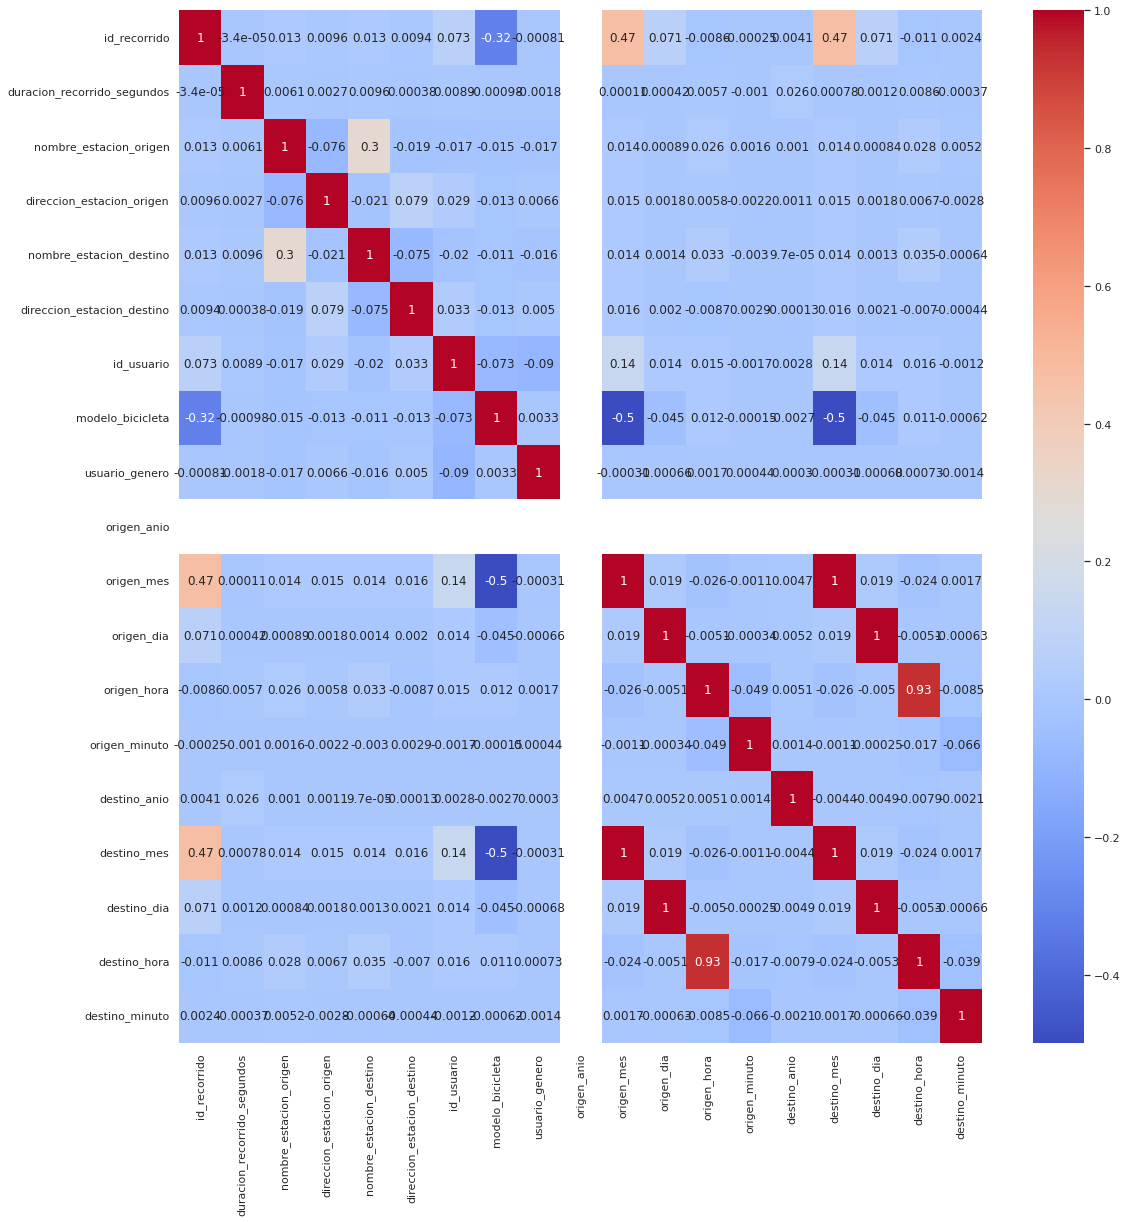

In [24]:
# Crear la matriz de correlación
correlation_matrix = datos_escalados.corr()
plt.figure(figsize=[18,19])
# Crear el mapa de calor utilizando Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.show()

### Relaciones entre pares de variables con correlacion superior al 40%

In [25]:
def filtrar_trios_correlacionados(df_correlacion, umbral):
    columnas = df_correlacion.columns
    trios_correlacionados = []

    for i in range(len(columnas)):
        for j in range(i+1, len(columnas)):
            for k in range(j+1, len(columnas)):
                correlacion_ij = abs(df_correlacion.iloc[i, j])
                correlacion_ik = abs(df_correlacion.iloc[i, k])
                correlacion_jk = abs(df_correlacion.iloc[j, k])

                if correlacion_ij > umbral and correlacion_ik > umbral and correlacion_jk > umbral:
                    trios_correlacionados.append((columnas[i], columnas[j], columnas[k]))

    return trios_correlacionados


In [32]:
def filtrar_pares_correlacionados(df_correlacion, umbral):
    columnas = df_correlacion.columns
    pares_correlacionados = []

    for i in range(len(columnas)):
        for j in range(i+1, len(columnas)):
                correlacion_ii = abs(df_correlacion.iloc[i, i])
                correlacion_ij = abs(df_correlacion.iloc[i, j])

                if correlacion_ij > umbral and correlacion_ii > umbral:
                    pares_correlacionados.append((columnas[i], columnas[j]))

    return pares_correlacionados

In [30]:
umbral = 0.4

In [34]:
trios_filtrados = filtrar_trios_correlacionados(correlation_matrix, umbral)
trios_filtrados

[('id_recorrido', 'origen_mes', 'destino_mes'),
 ('modelo_bicicleta', 'origen_mes', 'destino_mes')]

In [33]:
pares_correlacionados = filtrar_pares_correlacionados(correlation_matrix, umbral)
pares_correlacionados

[('id_recorrido', 'origen_mes'),
 ('id_recorrido', 'destino_mes'),
 ('modelo_bicicleta', 'origen_mes'),
 ('modelo_bicicleta', 'destino_mes'),
 ('origen_mes', 'destino_mes'),
 ('origen_dia', 'destino_dia'),
 ('origen_hora', 'destino_hora')]

#### Relaciones entre variables individuales

In [50]:
pares_correlacionados

[('id_recorrido', 'origen_mes'),
 ('id_recorrido', 'destino_mes'),
 ('modelo_bicicleta', 'origen_mes'),
 ('modelo_bicicleta', 'destino_mes'),
 ('origen_mes', 'destino_mes'),
 ('origen_dia', 'destino_dia'),
 ('origen_hora', 'destino_hora')]

In [59]:
(pares_correlacionados, trios_filtrados)

([('id_recorrido', 'origen_mes'),
  ('id_recorrido', 'destino_mes'),
  ('modelo_bicicleta', 'origen_mes'),
  ('modelo_bicicleta', 'destino_mes'),
  ('origen_mes', 'destino_mes'),
  ('origen_dia', 'destino_dia'),
  ('origen_hora', 'destino_hora')],
 [('id_recorrido', 'origen_mes', 'destino_mes'),
  ('modelo_bicicleta', 'origen_mes', 'destino_mes')])

**Preguntas:**

1. Hay alguna relacion entre momento de que se toma una bicicleta al momento en que se deja en el lugar de destino?

<AxesSubplot:xlabel='origen_dia', ylabel='destino_dia'>

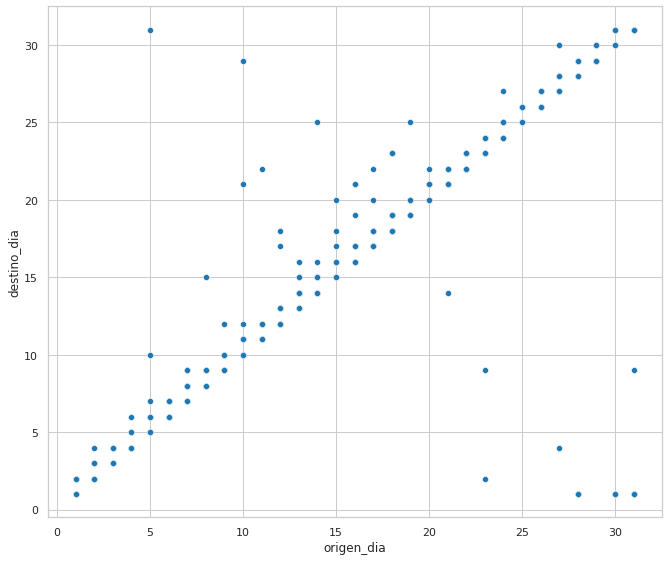

In [104]:
plt.grid(True)
sns.scatterplot(
    data= datos,
    x='origen_dia',
    y= 'destino_dia')

<AxesSubplot:xlabel='origen_hora', ylabel='destino_hora'>

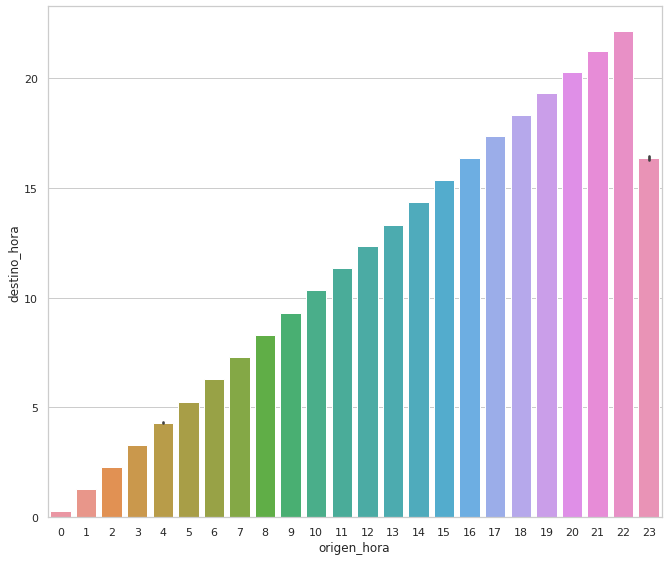

In [ ]:
plt.grid(True)
sns.barplot(
    data= datos,
    x='origen_hora',
    y= 'destino_hora')

In [ ]:
np.mean(datos.duracion_recorrido_segundos) / 60

20.641105366864316

Relacion entre el dia, mes y duracion del recorrido?

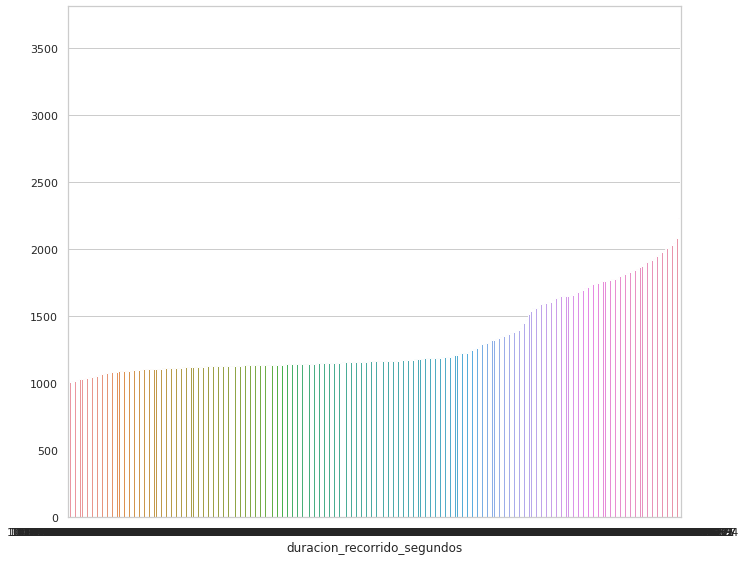

In [ ]:
# Calcular el promedio de duración de recorrido por mes y día de origen
promedio_mesdia_duracion = datos.groupby(['origen_mes', 'origen_dia'])['duracion_recorrido_segundos'].mean()

# Convertir los índices y valores a listas
mes_dia = promedio_mesdia_duracion.index.tolist()
duracion = promedio_mesdia_duracion.values.tolist()

# Crear el gráfico de dispersión utilizando Seaborn
sns.barplot(promedio_mesdia_duracion, x=mes_dia, y=duracion)

# Mostrar el gráfico
plt.show()

Por dia generalmente se entregan sobre el mismo dia, salvo pequeñas exepciones que se entregan generalmente al otro dia.
Se obvserva que las vicicletas que se toman a las 23hs seentregan generalmente al otro dia cerca de las 16hs, muy probablemnte por la inseguridad asociada a este rango horario.

Relacion entre el genero de la persona y duracion de recorrido?

In [110]:
# Calcular el promedio de duración de recorrido por mes y día de origen
bici_genero = datos.groupby('usuario_genero')['duracion_recorrido_segundos'].mean()

# Convertir los índices y valores a listas
genero = bici_genero.index.tolist()
duracion = bici_genero.values.tolist()

(-1.102406720447499,
 1.1001146057355953,
 -1.1038237345934838,
 1.1070557692088292)

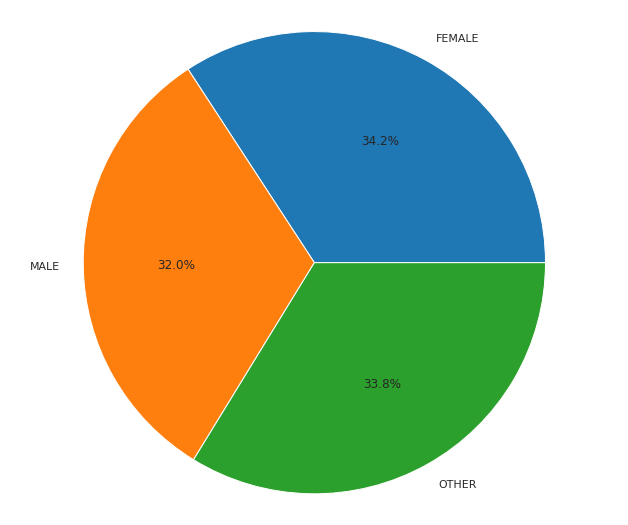

In [113]:
plt.pie(x=duracion, labels=genero, autopct='%1.1f%%')
plt.axis('equal')  # Para asegurar que el gráfico de pastel sea circular

Se observa una distribucion proporcional de los generos

3. Relacion entre la bici y duracion del recorrido?

In [ ]:
promedio_tiempo_uso = datos.groupby('modelo_bicicleta')['duracion_recorrido_segundos'].mean()

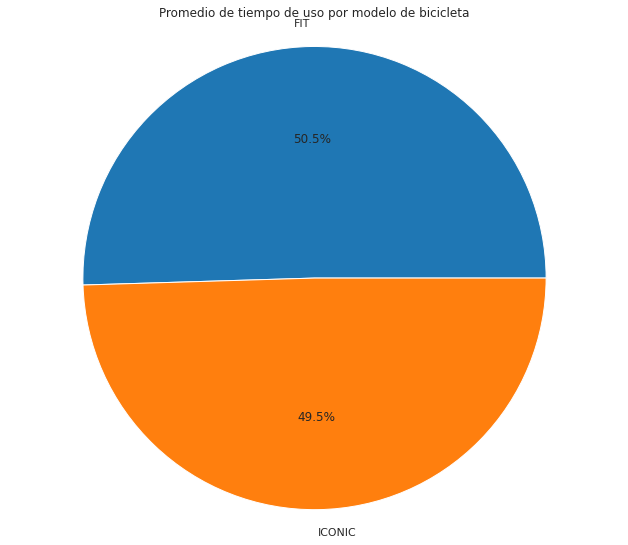

In [ ]:
# Crear lista de etiquetas y lista de valores para el gráfico de pastel
etiquetas = promedio_tiempo_uso.index.tolist()
valores = promedio_tiempo_uso.values.tolist()

# Crear el gráfico de pastel
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
plt.axis('equal')  # Para asegurar que el gráfico de pastel sea circular
plt.title('Promedio de tiempo de uso por modelo de bicicleta')
plt.show()

Bicicleta con mas nivel de uso?

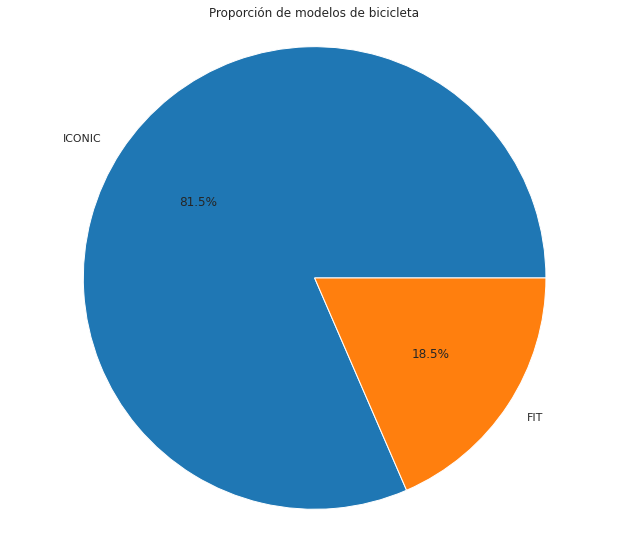

In [ ]:
# Obtener conteo de cada modelo de bicicleta
conteo_modelos = datos['modelo_bicicleta'].value_counts()

# Crear lista de etiquetas y lista de valores para el gráfico de pastel
etiquetas = conteo_modelos.index.tolist()
valores = conteo_modelos.values.tolist()

# Crear el gráfico de pastel
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
plt.axis('equal')  # Para asegurar que el gráfico de pastel sea circular
plt.title('Proporción de modelos de bicicleta')
plt.show()

El tiempo de uso promedio de las bicicletas es muy similar, aunque se nota una diferencia en la cantidad de veces que se utiliza cada una, siendo la "iconic" muy superior a la "fit" con un 81,5%